<a href="https://colab.research.google.com/github/fundaylncii/MachineLearning/blob/main/ClassificationAndRegressionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## CART: Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektedir.
## Heterojen bir ver seti belirlenmiş bir hedef değişkene göre hmojen alt gruplara ayrılır.

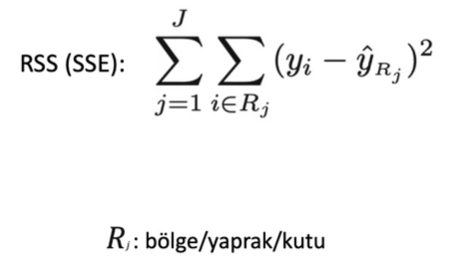

In [ ]:
## SSE = hata karaler toplamı
## Dallanmaların tespiti için değişkende birden fazla kombinasyon ile kırılım yaparak sse değeri bulunur.
## En düşük sse veren optimum kırılım noktasıdır.
## birden fazla değişken var ise tüm değişkenler için bu işlem yapılır ve en düşük sse ye sahip değişken en önemli olarak alınıp en üst kırılıma o konur.


In [ ]:
## cart modelleri çok iyi öğrenirler ancak overfitting olma olasılıkları yüksektir.
## Genellenebilirlik kabileyetlerini dallanma sayısı arttıkça kaybederler.
## Genellenebilirliği kaybetmek overfitting demektir.


In [ ]:
## Tahminleme başarısını : Gini katsayısı ve entropi ile yorumlayabiliriz. (homojenliği)
## Ne kadar düşükler ise o kadar iyidir.

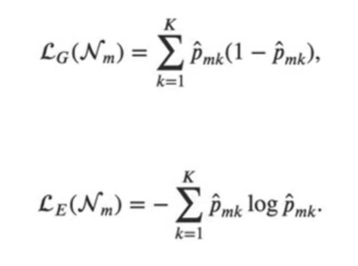

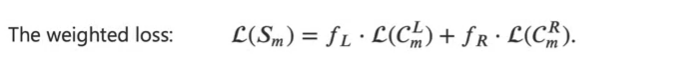

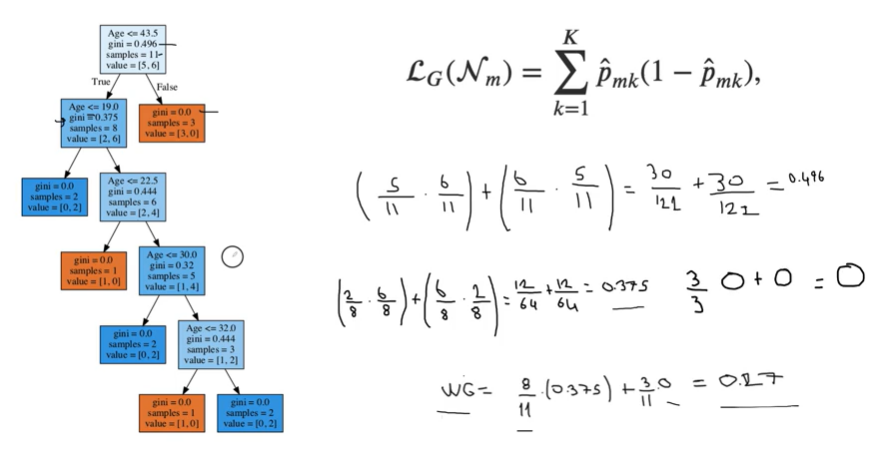

In [1]:
 ## CART KÜTÜPHANE KURULUMLARI:

!pip install pydotplus skompiler astor joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 545.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54310 sha256=c6db39ce232198b502ec452aa0586b37342ff8ca5d44b65488f0cbd2125ecf7f
  Stored in directory: /root/.cache/pip/wheels/c0/22/3d/bd8fd4c6cd205cf122a0974be908681472a6f44abd6b880614
Successfully built skompiler


In [2]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile

In [3]:
pd.set_option("display.max_columns", None)
warnings.simplefilter(action="ignore", category=Warning)

In [4]:
## MODELLEME
df = pd.read_csv("/content/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [5]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X,y)

In [6]:
## Confision matrix için y_pred:
y_pred = cart_model.predict(X)

In [7]:
## AUC için y_prob
y_prob = cart_model.predict_proba(X)[:,1]

In [8]:
## Confision Matrix:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [9]:
roc_auc_score(y, y_prob)

1.0

In [10]:
## Başarı nasıl daha doğru değerlendirilir??
## Hold up yöntemi ile:

## %70 train seti %30 test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)


In [11]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train,y_train)

In [12]:
## Train Hatası:

y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:,1]
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

In [14]:
## Test Hatası
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



0.6739506172839506

In [ ]:
## Model eğitildiği veride çok yüksek başarı sağladı ancak test verisinde kötü bir başarı elde etti.
## Bu durumda model overfitting olmuştur.

In [18]:
## Cross Validation İle Başarı Değerlendirme:

car_model = DecisionTreeClassifier(random_state=17).fit(X,y)
cv_resuld = cross_validate(cart_model,
                           X,y,
                           cv=5,
                           scoring=["accuracy","f1","roc_auc"])
print(cv_resuld["test_accuracy"].mean())
print(cv_resuld["test_f1"].mean())
print(cv_resuld["test_roc_auc"].mean())

0.7058568882098294
0.5710621194523633
0.6719440950384347


In [ ]:
## Model başarısı nasıl arttırılır?
## Feature eklenerek, veri önişleme işlemleri yaparak, hiperparametre optimizasyonu yaparak.


In [19]:
## Hiperparametre Optimizasyonu:

cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [ ]:
## min_samples_split : son bölme işleminde kalan değişken sayısı
## max_depth: ağaç derinliği

In [20]:
## range kısmında girilen değerler için modelin ön tanımlı değerlerine bakılır o değerleri içeren bir aralık belirlenir.
cart_params = {"max_depth": range(1,11),
               "min_samples_split": range(2,20)}

In [21]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X,y)
                              ## verbose = 2 olması yapılan işlemleri ekrana raporlamayı sağlar

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [22]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [23]:
cart_best_grid.best_score_

0.7500806383159324

In [ ]:
## GridSearchCV en iyi modeli içinde saklar. yani aslında final model buradadır.

In [24]:
## Final Model Kurulumu:

cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X,y)
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [25]:
## 2. yöntem ile final model oluşturma:

cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X,y)

In [26]:
cv_resuld = cross_validate(cart_final,
                           X,y,
                           cv=5,
                           scoring=["accuracy","f1","roc_auc"])
print(cv_resuld["test_accuracy"].mean())
print(cv_resuld["test_f1"].mean())
print(cv_resuld["test_roc_auc"].mean())

0.7500806383159324
0.614625004082526
0.797796645702306


In [27]:
## Feature Importance (Özellik Önemi)
def plot_importance(model, feature, num=len(X), save=False):
  feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": feature.columns})
  plt.figure(figsize=(10, 10))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")

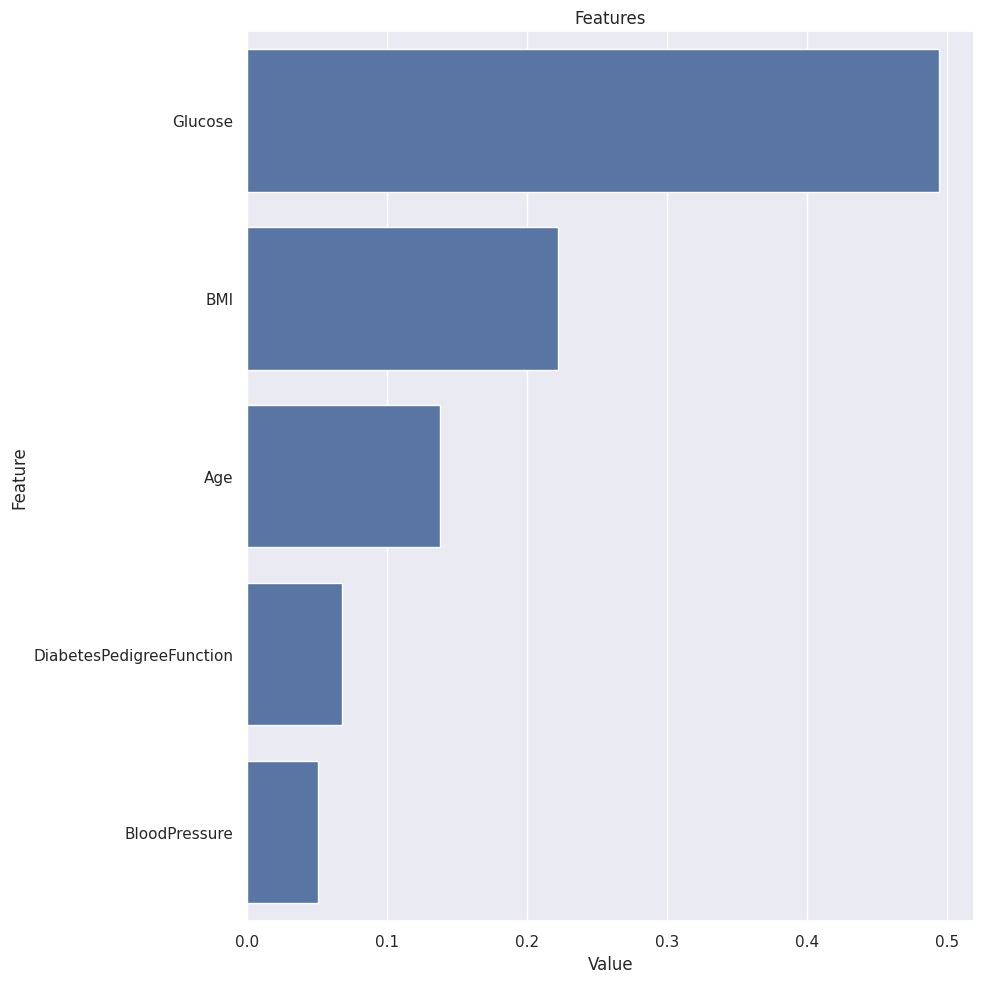

In [29]:
plot_importance(cart_final, X, num=5)

In [30]:
## Öğrenme Eğrileriyle Model Karmaşıklığı Analiz Etme:


train_score, test_score = validation_curve(cart_final, X, y,
                                           param_name="max_depth",
                                           param_range = range(1,11),
                                           scoring = "roc_auc",
                                           cv=10)


In [32]:
print(train_score)

[[0.72320885 0.72306132 0.68555095 0.72350392 0.71698479 0.7011941
  0.66131397 0.71142923 0.71549128 0.71120294]
 [0.7987598  0.79874136 0.76659751 0.8000461  0.80217151 0.77901798
  0.76472568 0.79175657 0.80145087 0.79440771]
 [0.84255417 0.84810512 0.82195943 0.84559705 0.8434532  0.81859843
  0.82218534 0.83455048 0.8413315  0.84593664]
 [0.8834947  0.88264638 0.86355002 0.88926233 0.88226372 0.87104195
  0.86404334 0.87285846 0.87436639 0.87684114]
 [0.91531581 0.9138497  0.89976487 0.92513601 0.91451821 0.90380821
  0.88505302 0.90792531 0.91068411 0.90586318]
 [0.94068234 0.94559244 0.92840479 0.94609959 0.94535731 0.9309728
  0.91167819 0.93286307 0.94030303 0.93088154]
 [0.96760258 0.96744583 0.95147533 0.96842785 0.96832181 0.95850161
  0.93983864 0.96071    0.96145546 0.95757576]
 [0.97867681 0.98590595 0.97366067 0.98507146 0.98053481 0.9728308
  0.95985247 0.97829414 0.98042241 0.97642792]
 [0.99069617 0.99204703 0.98704472 0.99204703 0.98892577 0.98575841
  0.97496542 0.

In [33]:
print(test_score)

[[0.64777778 0.64925926 0.68074074 0.64481481 0.64222222 0.68481481
  0.63666667 0.75333333 0.71692308 0.75615385]
 [0.73407407 0.74888889 0.73555556 0.71592593 0.61703704 0.77777778
  0.70481481 0.82555556 0.74615385 0.80038462]
 [0.78407407 0.81333333 0.77222222 0.68296296 0.69296296 0.82925926
  0.79259259 0.85814815 0.72615385 0.80807692]
 [0.76481481 0.81148148 0.74962963 0.60740741 0.70888889 0.82111111
  0.83851852 0.87333333 0.77038462 0.81961538]
 [0.73444444 0.78666667 0.76333333 0.60037037 0.71925926 0.84814815
  0.80074074 0.88296296 0.75730769 0.81769231]
 [0.72814815 0.77962963 0.7462963  0.59481481 0.76259259 0.82740741
  0.81592593 0.83185185 0.76038462 0.77692308]
 [0.74222222 0.77888889 0.75222222 0.54296296 0.71851852 0.75444444
  0.82481481 0.8462963  0.67346154 0.76961538]
 [0.71481481 0.7137037  0.75222222 0.54148148 0.63851852 0.75259259
  0.81222222 0.74555556 0.68538462 0.78076923]
 [0.69185185 0.69851852 0.72296296 0.52407407 0.62185185 0.7262963
  0.82111111 

In [ ]:
## her array cv =10 için 10 kombinasyonun tek sonucudur
## arrayların içerisindeki değerler ise her değişkenin roc_auc değerleri
## bunların ortalamaları alınırsa

In [36]:
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)
print(mean_train_score)
print("--------------------------------------")
print(mean_test_score)

[0.70729413 0.78976751 0.83642714 0.87603684 0.90819184 0.93528351
 0.96013549 0.97716774 0.98781586 0.99359846]
--------------------------------------
[0.68127066 0.74061681 0.77597863 0.77651852 0.77109259 0.76239744
 0.74034473 0.7137265  0.69966524 0.69232051]


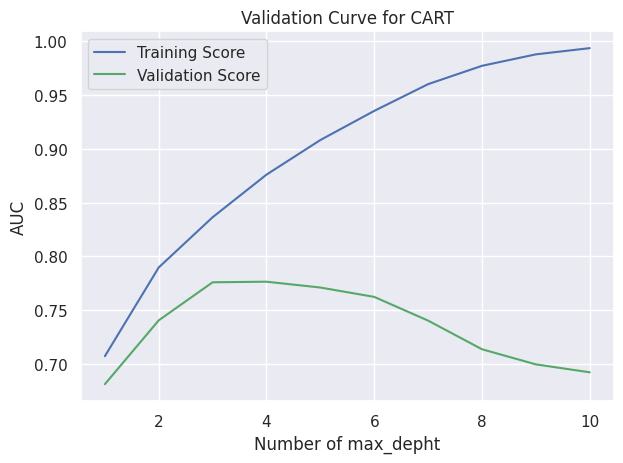

In [37]:
## Görselleştirme:

plt.plot(range(1,11), mean_train_score,
         label="Training Score", color="b")

plt.plot(range(1,11), mean_test_score,
         label="Validation Score", color="g")

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depht")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
## max_depht = 3 den sonra test scoreında düşüş var yani train den ayrım yapıldığı noktadır.

In [42]:
## Fonksiyon Haline Getirme:

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(model,
                                               X=X,
                                               y=y,
                                               param_name=param_name,
                                               param_range=param_range,
                                               scoring=scoring,
                                               cv=cv)
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.figure()
    plt.plot(param_range, mean_train_score, label="Training Score", color="b")
    plt.plot(param_range, mean_test_score, label="Validation Score", color="g")
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()


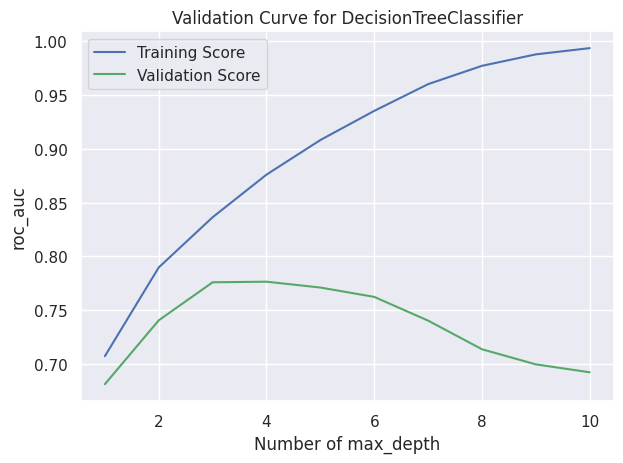

In [43]:
val_curve_params(cart_final, X, y, "max_depth", range(1,11))

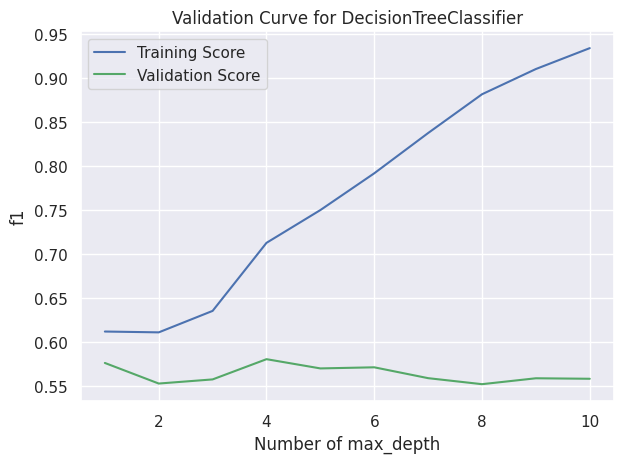

In [44]:
val_curve_params(cart_final, X, y, "max_depth", range(1,11), scoring="f1")

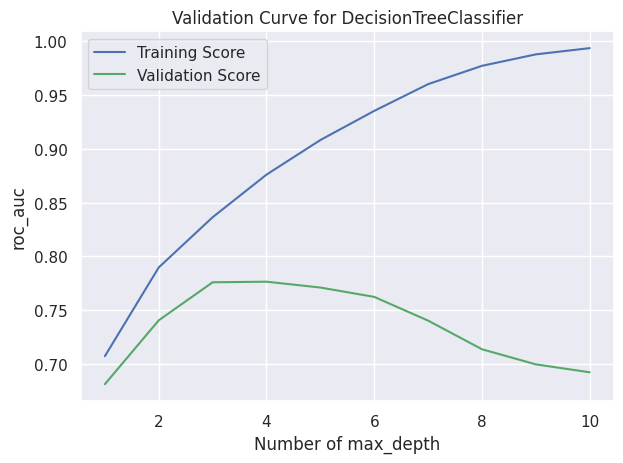

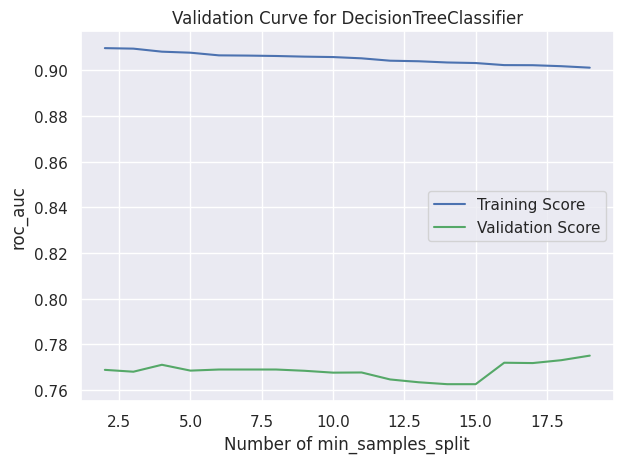

In [47]:
cart_val_params = [["max_depth", range(1,11)], ["min_samples_split", range(2,20)]]

for i in range(len(cart_val_params)):
  val_curve_params(cart_final, X, y, cart_val_params[i][0], cart_val_params[i][1])

In [48]:
## Görselleştirme: (Visualization)

!pip install graphviz

In [52]:
def tree_graph(model, col_names, file_name):
  tree_str = export_graphviz(model, feature_names= col_names, filled=True, out_file=None)
  graph = pydotplus.graph_from_dot_data(tree_str)
  graph.write_png(file_name)

In [53]:
tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

In [54]:
## KARAR KURALLARI:

tree_rules = export_text(cart_final,feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

In [55]:
## Kural Kodlarını Python Kodu:
!pip install scikit-learn==0.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 33.2 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [56]:
import sklearn
sklearn.__version__

'1.2.2'

In [57]:
print(skompile(cart_final.predict).to("python/code"))

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )



In [62]:
print(skompile(cart_final.predict).to("excel"))

A1=IF((x2<=127.5),IF((x ...418 chars skipped... ((x5<=629.5),1,0))))


In [66]:
## Python Kodları İle Tahmin Yapma:

def predict_with_rules(x):
  return((((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <=
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    ))

In [64]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [67]:
## hasta değerleri
x = [12, 13, 20, 23, 4, 55, 12, 7]
predict_with_rules(x)

1

In [68]:
## Model Kaydetme ve Çağırma:

joblib.dump(cart_final, "cart_final.pkl")

['cart_final.pkl']

In [69]:
cart_model_from_disc = joblib.load("cart_final.pkl")

In [71]:
x = [12,13,20,23,4,55,12,7]
cart_model_from_disc.predict(pd.DataFrame(x).T)

array([1])